# **Bellabeat Case Study**

Mike Wang -2022


Bellabeat is a high-tech company founded by Urška Sršen and Sando Mur that manufactures health-focused smart products for women.By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their [website](https://bellabeat.com/).

The goal of this study is to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, provide management group with high-level recommendations for how these trends can inform Bellabeat marketing strategy.




**Three Key Questions:**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Business Task:

Identify growth for future depevelopment of Bellabeat products based on trend of small device usage data.

Data source:
[FitBit Fitness Tracker Data ](https://www.kaggle.com/datasets/arashnic/fitbit)

These data was collected by survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016 which tracked  responts' minute-level output for physical activity, heart rate, and sleep monitoring.

In [1]:
# import necessary libraries for computation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
# Loading relevant data table
daily_activity = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

This dataset includes users' data based on user id daily, includes:
* Total distance travelled
* Total steps
* Very activity minutes
* Fairly activity minutes
* Lightly activity minutes
* Sedendatry acitivity minutes
* Calorioes spent
* ... ...



In [2]:
# data preview 
# daily_activity.head(10)

y_train = np.array(daily_activity['Calories'])

In [3]:
calories = daily_activity['Calories']
calories.describe()

count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64

0.422450481396522


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


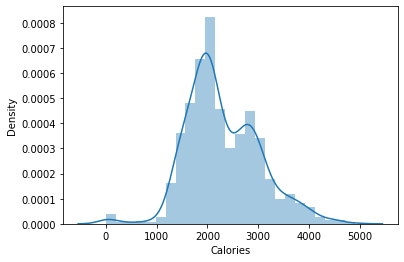

In [4]:
sns.distplot(calories)
print(calories.skew());

By looking at the distribution of calories from users, we observe a high peak at around 2000 calories, and the whole distribution has a slightly positive skewness since there is very few data below 1000.

In [5]:
daily_activity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

<AxesSubplot:>

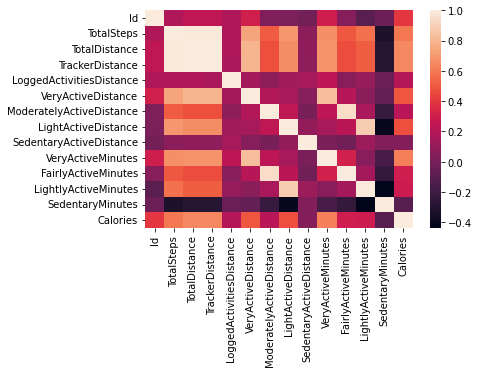

In [6]:
num_activity = daily_activity.select_dtypes(include = ('int64','float64'))
sns.heatmap(num_activity.corr())

By looking at variables' correlations with each other, we can see that 

<AxesSubplot:xlabel='LightlyActiveMinutes', ylabel='Calories'>

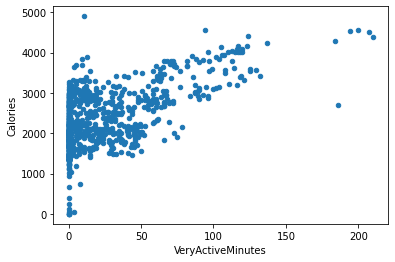

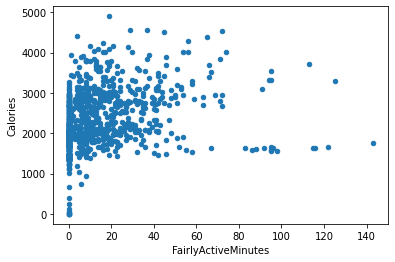

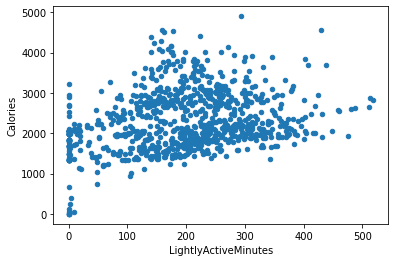

In [7]:
# Have a general view of relationship between predictor variables and calories
def scatterplot(x):
    data = pd.concat([calories, daily_activity[x]], axis = 1)
    return data.plot.scatter(x, y='Calories')
scatterplot('VeryActiveMinutes')
scatterplot('FairlyActiveMinutes')
scatterplot('LightlyActiveMinutes')

In [8]:
# Calculate cost function for multiple linear regression
def compute_cost(x1,x2,x3,y,w1,w2,w3,b):
    
    m1 = x1.shape[0]
    m2 = x2.shape[0]
    m3 = x3.shape[0]
    cost = 0
    
    assert m1==m2==m3
    for i in range[m1]:
        f_wb = b + w1*x1[i] + w2*x2[i] + w3*x3[i]
        cost += (y[i] - f_wb) ** 2
    avg_cost = (1/(2 * m)) * cost
    
    return avg_cost

In [9]:
# def compute_gradient(x1,x2,x3,y,w1,w2,w3,b):
#     m1 = x1.shape[0]
#     m2 = x2.shape[0]
#     m3 = x3.shape[0]
    
#     dj_dw1 = 0
#     dj_dw2 = 0
#     dj_dw3 = 0
#     dj_db = 0
    
#     assert m1==m2==m3
#     for i in range[m1]:
#         gradient = 

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session